In [2]:
import torch
import numpy as np
from torch import tensor
from numpy import array
from numpy import transpose

In [3]:
# input is scalar, output is scalar
x = tensor(1.0, requires_grad=True)
print('x:', x)
y = x**2
print('y:', y)
y.backward() # this is the same as y.backward(tensor(1.0))
print('x.grad:', x.grad)

# want: dy/dx
# dy/dx = d(x^2)/dx = 2x where x is 1, so
# gradient is 2

x: tensor(1., requires_grad=True)
y: tensor(1., grad_fn=<PowBackward0>)
x.grad: tensor(2.)


In [4]:
x = x.detach().numpy()
J = array([[2*x]])
print('J:', J)

J: [[2.]]


In [5]:
v = array([[1,]])
print('v:', v)
print('v*J:', v@J)

v: [[1]]
v*J: [[2.]]


In [6]:
# input is scalar, output is scalar, non-default gradient
x = torch.tensor(1.0, requires_grad=True)
print('x:', x)
y = x**2
print('y:', y)
gradient_value=100.0
print(y.backward(torch.tensor(gradient_value)))
print('x.grad:', x.grad)

x: tensor(1., requires_grad=True)
y: tensor(1., grad_fn=<PowBackward0>)
None
x.grad: tensor(200.)


In [7]:
x = x.detach().numpy()
J = array([[2*x]])
print('J:', J)

v = array([[gradient_value,]])
print('v:', v)
print('v*J:', v@J)

J: [[2.]]
v: [[100.]]
v*J: [[200.]]


In [8]:
# input is vector, output is scalar
x = tensor([1.,2.], requires_grad=True)
print('x:', x)
y = sum(x)
print('y:', y)
y.backward()
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor(3., grad_fn=<AddBackward0>)
x.grad: tensor([1., 1.])


In [9]:
J = array([[1,1]])
print('J:\n', J)

J:
 [[1 1]]


In [10]:
v = array([[1]])
print('v:', v)
print('v*J:', v@J)

v: [[1]]
v*J: [[1 1]]


In [11]:
# input is vector, output is vector
x = tensor([1., 2.], requires_grad=True)
print('x:', x)
y = 3*x**2
print('y:', y)
gradient_value = [1., 1.]
y.backward(tensor(gradient_value))
print('x.grad', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad tensor([ 6., 12.])


In [12]:
x = x.detach().numpy()
J = array([[6*x[0], 0],
           [0,6*x[1]]])
print('J:\n', J)

J:
 [[ 6.  0.]
 [ 0. 12.]]


In [13]:
v = array([gradient_value])
# v = 1 10 100

# J = 6 0
#      0 12
print('v trans:', transpose(v)) 
print('J trans:', transpose(J))

print('v:', v)
print('v*J:', v@J)

v trans: [[1.]
 [1.]]
J trans: [[ 6.  0.]
 [ 0. 12.]]
v: [[1. 1.]]
v*J: [[ 6. 12.]]


In [14]:
# input is vector, output is vector, non-one gradient
x = tensor([1., 2.], requires_grad=True)
print('x:', x)
y = 3*x**2
print('y:', y)
gradient_value = [1., 10.]
y.backward(tensor(gradient_value))
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad: tensor([  6., 120.])


In [15]:
x = x.detach().numpy()
J = array([[6*x[0], 0], [0, 6*x[1]]])
print('J:\n', J)

v = array([gradient_value])
print('v:', v)
print('v*J:', v@J)

J:
 [[ 6.  0.]
 [ 0. 12.]]
v: [[ 1. 10.]]
v*J: [[  6. 120.]]


In [16]:
# input is vector, output is vector - another example
x = tensor([1., 2.], requires_grad=True)
print('x:', x)
y = torch.empty(3)
y[0]=3*x[0]**2
y[1]=x[0]**2 + 2*x[1]**3
y[2]=10*x[1]
print('y:', y)
gradient_value = [1., 10., 100.,]
y.backward(tensor(gradient_value))
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 17., 20.], grad_fn=<CopySlices>)
x.grad: tensor([  26., 1240.])


In [17]:
x = x.detach().numpy()
J = array([[6*x[0], 0],
          [2*x[0], 6*x[1]**2],
          [0, 10]])
print('J:\n', J)

# the jacobian matrix
# 6 0         
# 2 24    
# 0 10         

v = array([1., 1., 1.])
# vector
# 1
# 10
# 100

print('v:', v)
print('v*J:', v@J)
# output ??
# 8
# 34

J:
 [[ 6.  0.]
 [ 2. 24.]
 [ 0. 10.]]
v: [1. 1. 1.]
v*J: [ 8. 34.]


In [18]:
#########
a = tensor([2., 3.], requires_grad=True)
b = tensor([6., 4.], requires_grad=True)
print('a:', a)
print('b:', b)

Q = 3*a**3 - b**2
# Jacobian matrix
#
#
#


print('Q:', Q)
gradient = tensor([1., 1.])
Q.backward(gradient=gradient)
print('a.grad:', a.grad)
print('b.grad:', b.grad)


a: tensor([2., 3.], requires_grad=True)
b: tensor([6., 4.], requires_grad=True)
Q: tensor([-12.,  65.], grad_fn=<SubBackward0>)
a.grad: tensor([36., 81.])
b.grad: tensor([-12.,  -8.])


In [19]:
from torch.autograd import Variable
import torch

In [20]:
x = Variable(torch.FloatTensor([[1, 2, 3, 4]]), requires_grad=True)
z = 2*x
loss = z.sum(dim=1)
print('x:', x)
print('z:', z)
print('loss:', loss)

# do backward for first element of z
z.backward(torch.FloatTensor([[1,0,0,0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_() #remove gradient in x.grad, or it will accumulate

# do backward for second element of z
z.backward(torch.FloatTensor([[0,1,0,0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# do backward for all elements of z, with weight equal to the derivitive of
# loss with respect to z_1, z_2, z_3, and z_4
z.backward(torch.FloatTensor([[1,1,1,1]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# or we can directly backprop using loss
loss.backward()
print(x.grad.data)

x: tensor([[1., 2., 3., 4.]], requires_grad=True)
z: tensor([[2., 4., 6., 8.]], grad_fn=<MulBackward0>)
loss: tensor([20.], grad_fn=<SumBackward1>)
tensor([[2., 0., 0., 0.]])
tensor([[0., 2., 0., 0.]])
tensor([[2., 2., 2., 2.]])
tensor([[2., 2., 2., 2.]])


In [21]:
x = torch.ones(3, requires_grad=True)
print(x)
# 1 1 1
y = 2*x**2 # y = 2x^2
print(y)
# 2 2 2
z = 5*y # z = 5y
print(z)
# 10 10 10
 # L = z + z + z
# 30
print(z)
# z.backward(tensor([1,1,1]))
loss = z.sum()
print(loss)
loss.backward()
print(x.grad)

# want dz/dx
# dz/dy = d(5y)/dy = 5
# dy/dx = d(2x^2)/dx = 4x
# dz/dx = dz/dy * dy/dx = 5 * 4x
# where x is = 1 so we have
# 5 * 4(1) = 20
# thus the grad is 20


tensor([1., 1., 1.], requires_grad=True)
tensor([2., 2., 2.], grad_fn=<MulBackward0>)
tensor([10., 10., 10.], grad_fn=<MulBackward0>)
tensor([10., 10., 10.], grad_fn=<MulBackward0>)
tensor(30., grad_fn=<SumBackward0>)
tensor([20., 20., 20.])


Implementing basic NN 

We are essentially trying to calculate the correct weights so our output is essentially, λx.2x



In [22]:
import numpy as np
from numpy import array

In [23]:
# f = w * x
# f = 2 * x

X = array([1,2,3,4], dtype=np.float32)
Y = array([2,4,6,8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w*x
# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()
    
# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y,y_predicted):
    return ((2*x)@(y_predicted-y)).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients
    dw = gradient(X, Y, y_pred)
    
    # update weights
    w -= learning_rate * dw
    
    if epoch % 1 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')


print(f'prediction after taining f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314570
epoch 7: w = 1.997, loss = 0.00050332
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
prediction after taining f(5) = 9.999


That stuff put with pytorch

1. Design our model (input size, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward pass: compute prediction
    - backward pass: gradients
    - update our weights


In [24]:
import torch
from torch import tensor
import torch.nn as nn

In [25]:
X = tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = tensor([[2],[4],[6],[8]], dtype=torch.float32)

# forward

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features
# model = nn.Linear(input_size, output_size,)

class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

# model prediction
X_test = tensor([5.])
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# SGD = Stochastic Gradient Descent 

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() #dL/dw
    
    # update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')


print(f'prediction after taining f(5) = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5) = 4.961
epoch 1: w = 0.966, loss = 6.18961906
epoch 11: w = 1.538, loss = 0.33770791
epoch 21: w = 1.639, loss = 0.17596984
epoch 31: w = 1.663, loss = 0.16205159
epoch 41: w = 1.675, loss = 0.15252422
epoch 51: w = 1.685, loss = 0.14364399
epoch 61: w = 1.695, loss = 0.13528314
epoch 71: w = 1.704, loss = 0.12740897
epoch 81: w = 1.713, loss = 0.11999313
epoch 91: w = 1.721, loss = 0.11300892
prediction after taining f(5) = 9.441


Implementing linear regression

In [26]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
#0) prepare data
#1) model
#2) loss and optimizer
#3) training loop

epoch: 10, loss: 4286.0806
epoch: 20, loss: 3199.8369
epoch: 30, loss: 2413.8992
epoch: 40, loss: 1844.6357
epoch: 50, loss: 1431.9042
epoch: 60, loss: 1132.3882
epoch: 70, loss: 914.8486
epoch: 80, loss: 756.7252
epoch: 90, loss: 641.7078
epoch: 100, loss: 557.9899


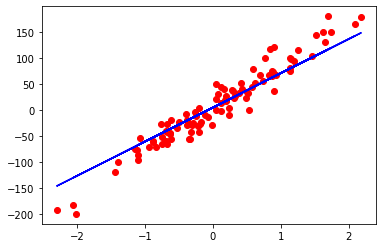

In [27]:
# preparing data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1)   

n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = .01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
# training loops
num_epochs = 100
for epoch in range(num_epochs):
    
    # forward pass and loss
    yp = model(X)
    loss = criterion(yp, Y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # empty gradients
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')
    
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()    

Logistic Regression
1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. training loop
    - forward pass: prediction and loss
    - backward pass: gradients
    - update weights 

In [28]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
# prepare the data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterian = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# training
num_epochs = 100
for epoch in range(num_epochs):
    
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # empty gradients
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')


569 30
epoch: 10, loss = 0.2684
epoch: 20, loss = 0.2276
epoch: 30, loss = 0.1967
epoch: 40, loss = 0.1735
epoch: 50, loss = 0.1559
epoch: 60, loss = 0.1422
epoch: 70, loss = 0.1313
epoch: 80, loss = 0.1224
epoch: 90, loss = 0.1151
epoch: 100, loss = 0.1088
accuracy = 0.8772


The breast cancer data is stored in a sklearn 'bunch'
This is essentially a python dictionary

In [30]:
bc = datasets.load_breast_cancer()
print('type: ', type(bc))

type:  <class 'sklearn.utils._bunch.Bunch'>


We then get the following keys

In [31]:
print('keys: ', bc.keys())

keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


*data* is all the feature data (the attributes of the scan that help us identify if the tumor is malignant or benign, such as radius, area, etc.) in a NumPy array

*target* is the target data (the variable you want to predict, in this case whether the tumor is malignant or benign) in a NumPy array

data in this case, represent the features of our NN, that is, the variables of our model that we use to predict the target

In our case, the target data is one column that classifies the tumor as either 0 indicating malignant, or 1 for benign

feature_names are the names of the features variables, in other words, names of the columns in data

target_names is the names of the target variables, in other words names of the target columns

DESCR, is a description of the dataset

filename is the path to the actual file of the data in CSV format

In [32]:
print('feature names: ', bc.feature_names)
print('target names: ', bc.target_names)
print('DESCR: ', bc.DESCR)
print('filename: ', bc.filename)

feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target names:  ['malignant' 'benign']
DESCR:  .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (sta

now as a pandas dataframe

In [39]:
# import pandas
import pandas as pd

# read the df, first using the feature data
df = pd.DataFrame(bc.data, columns=bc.feature_names)

# add a target column, and fill it with the target data
df['target'] = bc.target

# show the first five rows
df.head(15)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

lets do some ML

In [ ]:
# store the feature data
X = bc.data

# store the target data
y = data.target

# split the data using sklearn train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

This gives us two datasets - on for training and one for testing.

In [41]:
# prepare the data

# shape attribute returns dimensions of m x n matrix in a tuple (m, n). m being the sample, and n being features
n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# scale , this makes it easier for the model to learn and understand the problem
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterian = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# training
num_epochs = 100
for epoch in range(num_epochs):
    
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # empty gradients
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')


/Users/raffaelemannarelli/Downloads/personal projects/pytorch_intro/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9210526315789473